In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from functools import reduce
import scipy
from copy import deepcopy
from scipy.linalg import logm
import numpy as np
import dill


In [3]:
import dill 
num_keep = 200
filename = 'pickled_controls4.pkl'
pca = dill.load(open(filename, 'rb'))
pca.controlset = pca.controlset[:num_keep]

In [4]:
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx, np.sum(top_values)

In [5]:
num_weights = 10
scale = 100
num_points = 11
num_processors = 4

In [6]:
from convex import all_derivs, optimal_weights_1st_order, optimal_weights
from pauli_channel_approximation import PCA
# If the tolerance is too high (i.e. not zero) and the number of controls is too high (e.g. >100) this was failing with ECOS.
pca.derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)

Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 32 derivative.
Control 33 derivative.
Control 34 derivative.
Control 35 derivative.
Control 36 derivative.
Control 37 derivative.
Control 38 derivative.
Control 39 derivative.
Control 40 derivative.
Control 41 derivative.
Control 42 derivative.
Control 43 derivative

Control 154 derivative.
Control 155 derivative.
Control 156 derivative.
Control 157 derivative.
Control 158 derivative.
Control 159 derivative.
Control 160 derivative.
Control 161 derivative.
Control 162 derivative.
Control 163 derivative.
Control 164 derivative.
Control 165 derivative.
Control 166 derivative.
Control 167 derivative.
Control 168 derivative.
Control 169 derivative.
Control 170 derivative.
Control 171 derivative.
Control 172 derivative.
Control 173 derivative.
Control 174 derivative.
Control 175 derivative.
Control 176 derivative.
Control 177 derivative.
Control 178 derivative.
Control 179 derivative.
Control 180 derivative.
Control 181 derivative.
Control 182 derivative.
Control 183 derivative.
Control 184 derivative.
Control 185 derivative.
Control 186 derivative.
Control 187 derivative.
Control 188 derivative.
Control 189 derivative.
Control 190 derivative.
Control 191 derivative.
Control 192 derivative.
Control 193 derivative.
Control 194 derivative.
Control 195 deri

In [7]:
pca.weights_0 = optimal_weights(pca.derivs[:1], sparsity=True, sparsity_param=1E-3)

Done with convex problem 0 out of 200
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type     

17  1.2e-06  1.2e-06  1.4e-03  4.22e-01   2.312528079e-03   2.313537325e-03   1.2e-06  0.06  
18  3.7e-07  3.7e-07  7.5e-04  7.78e-01   2.071550780e-03   2.071841187e-03   3.7e-07  0.06  
19  9.3e-08  9.3e-08  3.5e-04  6.64e-01   1.707808511e-03   1.707876119e-03   9.3e-08  0.06  
20  1.4e-08  1.4e-08  1.6e-04  9.06e-01   1.612808227e-03   1.612769207e-03   1.4e-08  0.06  
21  1.6e-10  1.6e-10  1.6e-05  9.75e-01   1.589671117e-03   1.589670748e-03   1.6e-10  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.5896711174e-03    nrm: 6e+02    Viol.  con: 5e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.5896707477e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 5e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4

10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.563275813e-02   2.470950887e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.18e-01   1.550734669e-02   1.508424466e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.264292775e-02   1.246466497e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.63e-01   7.701013602e-03   7.604980255e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.47e-01   6.668685743e-03   6.631897029e-03   2.9e-05  0.03  
15  1.0e-05  1.0e-05  6.3e-03  3.81e-01   4.122436300e-03   4.112398461e-03   1.0e-05  0.03  
16  3.3e-06  3.3e-06  3.2e-03  7.06e-01   3.520536746e-03   3.517961562e-03   3.3e-06  0.03  
17  1.1e-06  1.1e-06  1.4e-03  4.43e-01   2.373132025e-03   2.373740131e-03   1.1e-06  0.03  
18  3.4e-07  3.4e-07  7.4e-04  7.94e-01   2.137794647e-03   2.137939521e-03   3.4e-07  0.03  
19  4.8e-08  4.8e-08  2.8e-04  7.21e-01   1.788518179e-03   1.788476073e-03   4.8e-08  0.04  
20  1.6e-09  1.6e-09  5.5e-05  9.63e-01   1.742577026e-03   

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837742043e-01   8.081743500e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269168162e-01   1.463776561e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549536713e-01   5.530469938e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084460275e-01   8.323864648e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.757680832e-02   5.484037878e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.461549493e-02   5.028917167e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.188104854e-02   2.852908671e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.564720969e-02   2.472525356e-02   1.5e-03  0.03  
11  5.6e-04  5.6e-04  1.1e-01  5.19e-01   1.552781972e-02   1.510710872e-02   5.6e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.265871309e-02   1.248172188e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.72e-01   7.747841346e-03   

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707466250e+00   -7.917557696e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469576549e-01   1.051247595e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837407508e-01   8.076276421e-02   1.3e-01  0.05  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269416306e-01   1.464082829e-01   1.0e-01  0.05  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549773506e-01   5.533418463e-02   9.4e-02  0.05  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.0850

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
I

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix vari

20  1.1e-08  1.1e-08  1.2e-04  8.45e-01   1.496886346e-03   1.496881478e-03   1.1e-08  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.4968863463e-03    nrm: 7e+02    Viol.  con: 4e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.4968814784e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.259075060e-02   1.241298836e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.57e-01   7.653874241e-03   7.558230597e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.44e-01   6.614026657e-03   6.577421359e-03   2.9e-05  0.03  
15  1.0e-05  1.0e-05  6.3e-03  3.72e-01   4.058669787e-03   4.049054347e-03   1.0e-05  0.03  
16  3.3e-06  3.3e-06  3.2e-03  6.99e-01   3.451573833e-03   3.449358216e-03   3.3e-06  0.03  
17  1.2e-06  1.2e-06  1.4e-03  4.18e-01   2.284493601e-03   2.285700358e-03   1.2e-06  0.03  
18  3.7e-07  3.7e-07  7.4e-04  7.74e-01   2.042288665e-03   2.042665842e-03   3.7e-07  0.03  
19  6.6e-08  6.6e-08  2.8e-04  6.51e-01   1.613435322e-03   1.613524910e-03   6.6e-08  0.03  
20  4.7e-09  4.7e-09  7.1e-05  9.35e-01   1.544270191e-03   1.544279862e-03   4.7e-09  0.03  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084557496e-01   8.324407374e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.757631915e-02   5.483683310e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460357284e-02   5.027758582e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.186602491e-02   2.851195582e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562404234e-02   2.470045916e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548280228e-02   1.505945147e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.260311823e-02   1.242453564e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.55e-01   7.651852930e-03   7.555377632e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.43e-01   6.610545623e-03   6.573645519e-03   2.9e-05  0.04  
15  1.0e-05  1.0e-05  6.3e-03  3.65e-01   4.034870949e-03   4.025252455e-03   1.0e-05  0.04  
16  3.4e-06  3.4e-06  3.1e-03  6.97e-01   3.423930799e-03   

Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707417792e+00   -7.919897859e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469191989e-01   1.048597276e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836935567e-01   8.071636487e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269051794e-01   1.463716172e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549176808e-01   5.526212724e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084664018e-01   8.325424794e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.758570124e-02   5.484702719e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460352748e-0

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - C

21  8.3e-09  8.3e-09  1.0e-04  9.65e-01   1.564373368e-03   1.564373811e-03   8.3e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.5643733684e-03    nrm: 6e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.5643738109e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

14  2.9e-05  2.9e-05  1.5e-02  7.43e-01   6.612119863e-03   6.575354015e-03   2.9e-05  0.04  
15  1.0e-05  1.0e-05  6.3e-03  3.68e-01   4.046022194e-03   4.036408208e-03   1.0e-05  0.04  
16  3.4e-06  3.4e-06  3.2e-03  6.98e-01   3.436852119e-03   3.434719011e-03   3.4e-06  0.04  
17  1.2e-06  1.2e-06  1.4e-03  4.15e-01   2.266241881e-03   2.267586504e-03   1.2e-06  0.04  
18  3.8e-07  3.8e-07  7.4e-04  7.69e-01   2.021894065e-03   2.022337807e-03   3.8e-07  0.04  
19  1.1e-07  1.1e-07  3.5e-04  6.32e-01   1.641010997e-03   1.641198035e-03   1.1e-07  0.04  
20  1.8e-08  1.8e-08  1.4e-04  8.78e-01   1.520659562e-03   1.520692217e-03   1.8e-08  0.04  
21  2.4e-10  2.4e-10  1.6e-05  9.68e-01   1.490829301e-03   1.490829799e-03   2.4e-10  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.4908293007e-03    nrm: 7e+02    Viol.  con: 8e-10    var: 0e+00    cones: 0e+00  
  Du

7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.760540995e-02   5.486995537e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460580858e-02   5.028060746e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.188367475e-02   2.853073166e-02   5.8e-03  0.04  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.563071666e-02   2.470601974e-02   1.6e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.549352551e-02   1.506867784e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.262355893e-02   1.244433910e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.55e-01   7.660347441e-03   7.563228381e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.42e-01   6.621291532e-03   6.584085446e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.59e-01   4.026718479e-03   4.016936095e-03   1.1e-05  0.04  
16  3.4e-06  3.4e-06  3.2e-03  6.91e-01   3.410371314e-03   3.408308919e-03   3.4e-06  0.04  
17  1.3e-06  1.3e-06  1.4e-03  3.87e-01   2.203312348e-03   

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707438975e+00   -7.918871172e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469201943e-01   1.048315986e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836809123e-01   8.070666636e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268869690e-01   1.463528126e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.548917916e-01   5.523158338e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084429834e-01   8.322733668e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.756833898e-02   5.482748514e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460303296e-02   5.027727281e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.186201335e-02   

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - C

  Solution status : OPTIMAL
  Primal.  obj: 2.2214024510e-03    nrm: 5e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.2213801175e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

16  3.5e-06  3.5e-06  3.1e-03  6.83e-01   3.355496871e-03   3.353751353e-03   3.5e-06  0.03  
17  1.4e-06  1.4e-06  1.4e-03  3.53e-01   2.119408223e-03   2.122215999e-03   1.4e-06  0.03  
18  4.2e-07  4.2e-07  7.1e-04  7.40e-01   1.860922728e-03   1.862020579e-03   4.2e-07  0.03  
19  1.9e-07  1.9e-07  4.0e-04  5.17e-01   1.490857035e-03   1.491808734e-03   1.9e-07  0.03  
20  3.1e-08  3.1e-08  1.6e-04  6.88e-01   1.190487372e-03   1.190546917e-03   3.1e-08  0.03  
21  5.1e-09  5.1e-09  1.0e-08  8.73e-01   1.108167676e-03   1.108176312e-03   5.1e-09  0.03  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1081676764e-03    nrm: 9e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1081763120e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460447455e-02   5.027880373e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.187453726e-02   2.852082179e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562708418e-02   2.470275281e-02   1.6e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548592553e-02   1.506159865e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.261024345e-02   1.243121439e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.54e-01   7.649555270e-03   7.552608150e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.608751712e-03   6.571626463e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.58e-01   4.015011702e-03   4.005353296e-03   1.1e-05  0.04  
16  3.4e-06  3.4e-06  3.2e-03  6.91e-01   3.398690351e-03   3.396720596e-03   3.4e-06  0.04  
17  1.3e-06  1.3e-06  1.4e-03  3.90e-01   2.198256633e-03   2.200164627e-03   1.3e-06  0.04  
18  3.8e-07  3.8e-07  7.1e-04  7.63e-01   1.948916152e-03   

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707415111e+00   -7.920024165e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469167539e-01   1.048420089e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836887782e-01   8.071164150e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268970135e-01   1.463644151e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549080256e-01   5.525408236e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084542288e-01   8.324306569e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.757485071e-02   5.483496530e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460266577e-02   5.027642261e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.186360114e-02   

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707540453e+00   -7.913968249e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469735344e-01   1.051441156e-02   1.6e-01  0.0

Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00    

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

18  2.7e-07  2.7e-07  7.0e-04  7.73e-01   2.264087964e-03   2.264132965e-03   2.7e-07  0.04  
19  7.4e-08  7.4e-08  3.9e-04  8.22e-01   2.075910373e-03   2.075793334e-03   7.4e-08  0.04  
20  5.6e-09  5.6e-09  1.1e-04  9.45e-01   2.008770637e-03   2.008757520e-03   5.6e-09  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.0087706374e-03    nrm: 5e+02    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.0087575203e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0            

12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.264205054e-02   1.246310899e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.59e-01   7.686632302e-03   7.589862061e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.44e-01   6.651820990e-03   6.614740405e-03   2.9e-05  0.03  
15  1.0e-05  1.0e-05  6.3e-03  3.70e-01   4.078572949e-03   4.068579090e-03   1.0e-05  0.03  
16  3.4e-06  3.4e-06  3.2e-03  6.99e-01   3.469098053e-03   3.466733227e-03   3.4e-06  0.03  
17  1.2e-06  1.2e-06  1.4e-03  4.16e-01   2.290558491e-03   2.291712678e-03   1.2e-06  0.03  
18  3.7e-07  3.7e-07  7.4e-04  7.73e-01   2.046165195e-03   2.046537183e-03   3.7e-07  0.03  
19  9.0e-08  9.0e-08  3.3e-04  6.46e-01   1.650333735e-03   1.650455998e-03   9.0e-08  0.03  
20  2.1e-08  2.1e-08  1.5e-04  9.06e-01   1.566228575e-03   1.566256986e-03   2.1e-08  0.03  
21  6.0e-09  6.0e-09  8.9e-05  9.72e-01   1.546167231e-03   1.546163995e-03   6.0e-09  0.03  
Optimizer terminated. Time: 0.04    


Interior-point soluti

4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.270014598e-01   1.464643975e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550749636e-01   5.544306869e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085594478e-01   8.336484253e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.766358299e-02   5.493906094e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.461955512e-02   5.029702854e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.193400794e-02   2.858713200e-02   5.8e-03  0.04  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.565758835e-02   2.473312028e-02   1.5e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.21e-01   1.555797000e-02   1.513324949e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.1e-02  7.20e-01   1.272220286e-02   1.254337592e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  3.0e-02  2.72e-01   7.777482802e-03   7.680837843e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.6e-02  7.49e-01   6.755656210e-03   

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707428261e+00   -7.919386746e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469108034e-01   1.047645541e-02   1.6e-01  0.02  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836680106e-01   8.069407507e-02   1.3e-01  0.02  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268734527e-01   1.463399457e-01   1.0e-01  0.02  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.548729511e-01   5.521161912e-02   9.4e-02  0.02  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.0842

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38        

  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3           

19  9.6e-08  9.6e-08  3.7e-04  7.03e-01   1.788298095e-03   1.788288963e-03   9.6e-08  0.04  
20  4.4e-09  4.4e-09  8.8e-05  9.04e-01   1.674307688e-03   1.674295994e-03   4.4e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.6743076885e-03    nrm: 6e+02    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.6742959942e-03    nrm: 1e+00    Viol.  con: 4e-19    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

12  2.1e-04  2.1e-04  6.1e-02  7.23e-01   1.278519536e-02   1.260580444e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  3.0e-02  2.76e-01   7.828937985e-03   7.731492796e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.6e-02  7.49e-01   6.815270049e-03   6.777327983e-03   2.9e-05  0.04  
15  1.0e-05  1.0e-05  6.6e-03  3.84e-01   4.237923945e-03   4.226572762e-03   1.0e-05  0.04  
16  3.3e-06  3.3e-06  3.4e-03  7.14e-01   3.637607768e-03   3.634352599e-03   3.3e-06  0.04  
17  1.0e-06  1.0e-06  1.4e-03  4.74e-01   2.499553757e-03   2.499465616e-03   1.0e-06  0.04  
18  3.0e-07  3.0e-07  7.5e-04  8.25e-01   2.282492981e-03   2.282430124e-03   3.0e-07  0.04  
19  1.1e-07  1.1e-07  4.6e-04  8.17e-01   2.105345183e-03   2.105193467e-03   1.1e-07  0.04  
20  2.9e-09  2.9e-09  7.1e-05  9.29e-01   2.008690241e-03   2.008688194e-03   2.9e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084428875e-01   8.322864913e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.756630932e-02   5.482512031e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460200580e-02   5.027576049e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.185842707e-02   2.850373923e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.561963229e-02   2.469615395e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.547350066e-02   1.505029939e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.258896987e-02   1.241038853e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.52e-01   7.635497842e-03   7.538978303e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.592217547e-03   6.555281230e-03   2.9e-05  0.03  
15  1.1e-05  1.1e-05  6.3e-03  3.59e-01   4.005332647e-03   3.995847784e-03   1.1e-05  0.03  
16  3.4e-06  3.4e-06  3.1e-03  6.91e-01   3.389904830e-03   

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707408501e+00   -7.920343658e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469115985e-01   1.048071596e-02   1.6e-01  0.02  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836821437e-01   8.070513329e-02   1.3e-01  0.02  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268923582e-01   1.463596323e-01   1.0e-01  0.02  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.548996293e-01   5.524355314e-02   9.4e-02  0.02  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084501583e-01   8.323747338e-02   4.7e-02  0.02  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.757221243e-02   5.483167514e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460192425e-02   5.027575543e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.186133750e-02   

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variabl

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.2655133347e-03    nrm: 8e+02    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.2655213341e-03    nrm: 1e+00    Viol.  con: 2e-19    var: 1e-08    cones: 0e+00  
Done with convex problem 70 out of 200
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries    

15  1.1e-05  1.1e-05  6.3e-03  3.53e-01   3.990066653e-03   3.980513826e-03   1.1e-05  0.03  
16  3.5e-06  3.5e-06  3.1e-03  6.85e-01   3.369421365e-03   3.367594732e-03   3.5e-06  0.04  
17  1.4e-06  1.4e-06  1.4e-03  3.63e-01   2.141905524e-03   2.144437148e-03   1.4e-06  0.04  
18  4.1e-07  4.1e-07  7.1e-04  7.47e-01   1.885718790e-03   1.886694601e-03   4.1e-07  0.04  
19  1.1e-07  1.1e-07  2.8e-04  5.40e-01   1.362639384e-03   1.363354934e-03   1.1e-07  0.04  
20  2.5e-08  2.5e-08  1.4e-04  8.41e-01   1.246975208e-03   1.247078488e-03   2.5e-08  0.04  
21  6.0e-09  6.1e-09  6.9e-05  9.03e-01   1.191935827e-03   1.191958273e-03   6.0e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1919358269e-03    nrm: 8e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1919582731e-03    nrm: 1e+00    Viol.  con: 2e-19    var: 2e-08    cones: 0e+00 

7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.757875255e-02   5.483978291e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460638181e-02   5.028141323e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.187238193e-02   2.852020966e-02   5.8e-03  0.04  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562157067e-02   2.469888786e-02   1.5e-03  0.04  
11  5.6e-04  5.6e-04  1.1e-01  5.17e-01   1.548839405e-02   1.506591686e-02   5.6e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.261450704e-02   1.243640033e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.59e-01   7.672599580e-03   7.576653268e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.45e-01   6.636073628e-03   6.599337199e-03   2.9e-05  0.04  
15  1.0e-05  1.0e-05  6.3e-03  3.74e-01   4.080074363e-03   4.070267283e-03   1.0e-05  0.04  
16  3.4e-06  3.4e-06  3.2e-03  7.00e-01   3.473266020e-03   3.470902915e-03   3.4e-06  0.04  
17  1.2e-06  1.2e-06  1.4e-03  4.21e-01   2.303617350e-03   

2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469090991e-01   1.047929588e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836816968e-01   8.070441503e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268946780e-01   1.463615631e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549018006e-01   5.524450605e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084547448e-01   8.324123681e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.757606258e-02   5.483591977e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460209619e-02   5.027634661e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.186411794e-02   2.850996163e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.561863269e-02   2.469484275e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.547323179e-02   1.504945777e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.259179800e-02   

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707407677e+00   -7.920386353e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469224104e-01   1.049060451e-02   1.6e-01  0.0

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variabl



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.4799847393e-03    nrm: 7e+02    Viol.  con: 4e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.4800243022e-03    nrm: 1e+00    Viol.  con: 4e-19    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

15  9.6e-06  9.6e-06  6.4e-03  4.08e-01   4.285320126e-03   4.274597971e-03   9.6e-06  0.04  
16  3.2e-06  3.2e-06  3.4e-03  7.24e-01   3.702189846e-03   3.698829484e-03   3.2e-06  0.04  
17  9.1e-07  9.1e-07  1.4e-03  5.12e-01   2.628077908e-03   2.627536054e-03   9.1e-07  0.04  
18  2.4e-07  2.4e-07  7.2e-04  8.47e-01   2.420891080e-03   2.420676840e-03   2.4e-07  0.04  
19  1.5e-08  1.5e-08  1.8e-04  8.68e-01   2.236168998e-03   2.236145299e-03   1.5e-08  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.2361689977e-03    nrm: 4e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.2361452991e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4

10  1.5e-03  1.5e-03  2.5e-01  1.06e+00   2.562037577e-02   2.470169258e-02   1.5e-03  0.04  
11  5.6e-04  5.6e-04  1.1e-01  5.19e-01   1.550571297e-02   1.508835989e-02   5.6e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.262998372e-02   1.245429778e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.73e-01   7.740345862e-03   7.646654073e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.50e-01   6.714553776e-03   6.678151122e-03   2.9e-05  0.04  
15  9.9e-06  9.9e-06  6.4e-03  3.95e-01   4.204259676e-03   4.193789368e-03   9.9e-06  0.04  
16  3.3e-06  3.3e-06  3.3e-03  7.11e-01   3.609444897e-03   3.606357693e-03   3.3e-06  0.04  
17  1.1e-06  1.1e-06  1.4e-03  4.64e-01   2.476577402e-03   2.476568470e-03   1.1e-06  0.04  
18  3.0e-07  3.0e-07  7.5e-04  8.15e-01   2.250918410e-03   2.250844541e-03   3.0e-07  0.04  
19  2.4e-08  2.4e-08  2.2e-04  7.85e-01   1.961097100e-03   1.961051456e-03   2.4e-08  0.04  
20  1.1e-10  1.1e-10  1.4e-05  9.90e-01   1.942725634e-03   

4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.270385120e-01   1.464980815e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.551380664e-01   5.551356412e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085892500e-01   8.340018569e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.769146739e-02   5.497279600e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.462811367e-02   5.030690657e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.196006461e-02   2.861649782e-02   5.8e-03  0.04  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.567478131e-02   2.475038556e-02   1.5e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.24e-01   1.559451642e-02   1.516994734e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.1e-02  7.23e-01   1.277513904e-02   1.259650116e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  3.0e-02  2.80e-01   7.839193514e-03   7.742740326e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.6e-02  7.52e-01   6.825530764e-03   

Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707580357e+00   -7.912052071e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.470140330e-01   1.054399641e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837842517e-01   8.081182186e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269707946e-01   1.464336043e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550225872e-01   5.538016065e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085306036e-01   8.332839106e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.764069018e-02   5.491148157e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.461515390e-0


Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.

  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the pri

21  9.7e-10  9.7e-10  3.9e-05  9.79e-01   1.663814864e-03   1.663813525e-03   9.7e-10  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.6638148638e-03    nrm: 6e+02    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.6638135253e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

13  1.0e-04  1.0e-04  2.9e-02  2.52e-01   7.640697971e-03   7.543896375e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.598227924e-03   6.561160312e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.57e-01   4.004323952e-03   3.994758375e-03   1.1e-05  0.04  
16  3.4e-06  3.4e-06  3.1e-03  6.90e-01   3.387217007e-03   3.385316827e-03   3.4e-06  0.04  
17  1.3e-06  1.3e-06  1.4e-03  3.85e-01   2.182961646e-03   2.185023405e-03   1.3e-06  0.04  
18  4.0e-07  4.0e-07  7.1e-04  7.57e-01   1.931380039e-03   1.932158804e-03   4.0e-07  0.04  
19  1.6e-07  1.6e-07  3.9e-04  5.74e-01   1.566027133e-03   1.566586312e-03   1.6e-07  0.04  
20  4.1e-08  4.1e-08  1.8e-04  7.80e-01   1.382207957e-03   1.382414827e-03   4.1e-08  0.04  
21  1.6e-08  1.6e-08  1.2e-04  9.10e-01   1.331811484e-03   1.331857525e-03   1.6e-08  0.04  
22  1.8e-09  1.8e-09  4.0e-05  9.59e-01   1.301168133e-03   1.301173508e-03   1.8e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point soluti

4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269170727e-01   1.463839097e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549355527e-01   5.528344582e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084804383e-01   8.327085305e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.759670471e-02   5.485964640e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460430656e-02   5.027926794e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.187819318e-02   2.852524337e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562405288e-02   2.469980110e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548506513e-02   1.506060305e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.261229487e-02   1.243318043e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.53e-01   7.649339885e-03   7.552284111e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.609225434e-03   

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707544101e+00   -7.913796670e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469675223e-01   1.050784512e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837127354e-01   8.074446485e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269054555e-01   1.463673628e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549211807e-01   5.525855589e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.0846

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 3

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix vari

18  3.0e-07  3.0e-07  7.3e-04  8.16e-01   2.229168705e-03   2.229141410e-03   3.0e-07  0.04  
19  4.3e-08  4.3e-08  2.8e-04  7.84e-01   1.960594524e-03   1.960545642e-03   4.3e-08  0.04  
20  6.6e-09  6.6e-09  1.1e-04  9.72e-01   1.925903676e-03   1.925896139e-03   6.6e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.9259036761e-03    nrm: 5e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.9258961386e-03    nrm: 1e+00    Viol.  con: 4e-19    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0            

12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.261166056e-02   1.243293720e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.55e-01   7.658228151e-03   7.561627873e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.43e-01   6.617990822e-03   6.581023580e-03   2.9e-05  0.04  
15  1.0e-05  1.0e-05  6.3e-03  3.65e-01   4.040182069e-03   4.030482789e-03   1.0e-05  0.04  
16  3.4e-06  3.4e-06  3.2e-03  6.96e-01   3.428781735e-03   3.426673654e-03   3.4e-06  0.04  
17  1.5e-06  1.5e-06  1.6e-03  4.10e-01   2.435270508e-03   2.436170797e-03   1.5e-06  0.04  
18  3.9e-07  3.9e-07  7.8e-04  6.52e-01   1.978224532e-03   1.978303486e-03   3.9e-07  0.04  
19  9.0e-08  9.0e-08  3.3e-04  6.34e-01   1.569232555e-03   1.569318833e-03   9.0e-08  0.04  
20  2.4e-08  2.4e-08  1.6e-04  8.85e-01   1.483839569e-03   1.483860019e-03   2.4e-08  0.04  
21  2.2e-09  2.2e-09  4.9e-05  9.45e-01   1.439747897e-03   1.439748908e-03   2.2e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point soluti

5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549343569e-01   5.528223990e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084790541e-01   8.326943541e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.759532606e-02   5.485804694e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460425158e-02   5.027912938e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.187714656e-02   2.852407851e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562382992e-02   2.469956925e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548408256e-02   1.505962593e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.261059777e-02   1.243148046e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.53e-01   7.647376334e-03   7.550318492e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.607039173e-03   6.569850051e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.56e-01   4.007321782e-03   

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707465201e+00   -7.917606153e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469422727e-01   1.049877216e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837085891e-01   8.073374696e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269103869e-01   1.463761345e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549282508e-01   5.527460157e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.0846

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38        

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix vari

18  3.4e-07  3.4e-07  7.5e-04  7.93e-01   2.136459914e-03   2.136606949e-03   3.4e-07  0.04  
19  7.1e-08  7.1e-08  3.3e-04  7.18e-01   1.814379175e-03   1.814351896e-03   7.1e-08  0.04  
20  1.9e-09  1.9e-09  5.3e-05  9.39e-01   1.737629977e-03   1.737628965e-03   1.9e-09  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.7376299766e-03    nrm: 6e+02    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.7376289655e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 5e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0            

11  5.7e-04  5.7e-04  1.1e-01  5.18e-01   1.549993131e-02   1.507572063e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.263472376e-02   1.245585376e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.58e-01   7.679442962e-03   7.582714786e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.44e-01   6.643614526e-03   6.606546548e-03   2.9e-05  0.03  
15  1.0e-05  1.0e-05  6.3e-03  3.68e-01   4.067583632e-03   4.057660157e-03   1.0e-05  0.03  
16  3.4e-06  3.4e-06  3.2e-03  6.98e-01   3.457643731e-03   3.455358518e-03   3.4e-06  0.03  
17  1.2e-06  1.2e-06  1.4e-03  4.18e-01   2.283452393e-03   2.284647526e-03   1.2e-06  0.03  
18  3.7e-07  3.7e-07  7.3e-04  7.73e-01   2.039493446e-03   2.039883433e-03   3.7e-07  0.03  
19  5.0e-08  5.0e-08  2.4e-04  6.47e-01   1.577922261e-03   1.578002500e-03   5.0e-08  0.03  
20  3.7e-09  3.7e-09  6.4e-05  9.57e-01   1.535258678e-03   1.535265190e-03   3.7e-09  0.04  
Optimizer terminated. Time: 0.04    


Interior-point soluti

5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549528264e-01   5.530493921e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084887396e-01   8.328216747e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.760260990e-02   5.486680893e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460586248e-02   5.028073927e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.188281853e-02   2.853007021e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562951977e-02   2.470513984e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.549388807e-02   1.506937594e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.262408472e-02   1.244501787e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.56e-01   7.664290386e-03   7.567330597e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.42e-01   6.625800976e-03   6.588654366e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.62e-01   4.037516987e-03   

Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707405436e+00   -7.920490611e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469046108e-01   1.047485705e-02   1.6e-01  0.02  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836698640e-01   8.069382543e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268800377e-01   1.463472013e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.548812369e-01   5.522194510e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084361500e-01   8.322103856e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.756089365e-02   5.481875965e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460084920e-0

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variabl

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.5404145506e-03    nrm: 6e+02    Viol.  con: 6e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.5404148490e-03    nrm: 1e+00    Viol.  con: 4e-19    var: 5e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

16  3.4e-06  3.4e-06  3.2e-03  6.96e-01   3.467671314e-03   3.465250181e-03   3.4e-06  0.05  
17  1.2e-06  1.2e-06  1.4e-03  4.04e-01   2.270052208e-03   2.271358421e-03   1.2e-06  0.05  
18  3.8e-07  3.8e-07  7.4e-04  7.71e-01   2.023215954e-03   2.023649592e-03   3.8e-07  0.05  
19  1.7e-07  1.7e-07  4.6e-04  6.43e-01   1.756923954e-03   1.757161512e-03   1.7e-07  0.05  
20  5.4e-08  5.4e-08  2.7e-04  8.00e-01   1.590565438e-03   1.590551071e-03   5.4e-08  0.05  
21  2.2e-09  2.2e-09  5.0e-05  9.15e-01   1.505664430e-03   1.505666545e-03   2.2e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.5056644299e-03    nrm: 7e+02    Viol.  con: 7e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.5056665449e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 7e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.757848675e-02   5.483889982e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460254423e-02   5.027646388e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.186524810e-02   2.851071354e-02   5.8e-03  0.04  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562256343e-02   2.469847457e-02   1.6e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.547670566e-02   1.505270554e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.259526526e-02   1.241630923e-02   2.1e-04  0.05  
13  1.0e-04  1.0e-04  2.9e-02  2.51e-01   7.634433218e-03   7.537510673e-03   1.0e-04  0.05  
14  2.9e-05  2.9e-05  1.5e-02  7.40e-01   6.591329866e-03   6.554197848e-03   2.9e-05  0.05  
15  1.1e-05  1.1e-05  6.3e-03  3.53e-01   3.989361850e-03   3.979837304e-03   1.1e-05  0.05  
16  3.5e-06  3.5e-06  3.1e-03  6.86e-01   3.369213797e-03   3.367397425e-03   3.5e-06  0.05  
17  1.3e-06  1.3e-06  1.4e-03  3.67e-01   2.146678463e-03   

0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707522275e+00   -7.914853512e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469704054e-01   1.051460526e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837291867e-01   8.075723823e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269235396e-01   1.463876414e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549490021e-01   5.529647546e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084799028e-01   8.327009651e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.759866804e-02   5.486266744e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460842480e-02   5.028373072e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.188466959e-02   2.853303650e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562888076e-02   

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707477100e+00   -7.917036382e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469616830e-01   1.051422471e-02   1.6e-01  0.0

Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00    

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix vari

19  1.8e-07  1.8e-07  4.0e-04  5.26e-01   1.492994115e-03   1.493895495e-03   1.8e-07  0.03  
20  2.7e-08  2.7e-08  1.5e-04  7.00e-01   1.202622306e-03   1.202677366e-03   2.7e-08  0.03  
21  1.0e-08  1.0e-08  9.4e-05  8.84e-01   1.149261999e-03   1.149279886e-03   1.0e-08  0.03  
22  5.6e-09  5.6e-09  6.9e-05  9.55e-01   1.135496276e-03   1.135505133e-03   5.6e-09  0.03  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1354962763e-03    nrm: 9e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1355051328e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Done with convex problem 140 out of 200
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3          

10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.565846616e-02   2.473387198e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.21e-01   1.556077934e-02   1.513585787e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.1e-02  7.20e-01   1.272798570e-02   1.254909071e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  3.0e-02  2.72e-01   7.782070136e-03   7.685369584e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.6e-02  7.49e-01   6.761240459e-03   6.723808191e-03   2.9e-05  0.03  
15  1.0e-05  1.0e-05  6.5e-03  3.84e-01   4.200173532e-03   4.189246826e-03   1.0e-05  0.03  
16  3.3e-06  3.3e-06  3.3e-03  7.08e-01   3.597510812e-03   3.594414450e-03   3.3e-06  0.04  
17  1.1e-06  1.1e-06  1.4e-03  4.51e-01   2.438298090e-03   2.438483154e-03   1.1e-06  0.04  
18  3.1e-07  3.1e-07  7.4e-04  8.10e-01   2.206673544e-03   2.206690265e-03   3.1e-07  0.04  
19  4.1e-08  4.1e-08  2.7e-04  7.67e-01   1.911040683e-03   1.910998225e-03   4.1e-08  0.04  
20  1.6e-10  1.6e-10  1.6e-05  9.73e-01   1.872344086e-03   

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837156310e-01   8.074833160e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269061949e-01   1.463675547e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549227186e-01   5.525937057e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084603966e-01   8.324278219e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.758647293e-02   5.484921584e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460995026e-02   5.028611259e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.188387482e-02   2.853403309e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562297305e-02   2.470146337e-02   1.5e-03  0.03  
11  5.6e-04  5.6e-04  1.1e-01  5.18e-01   1.550448236e-02   1.508317456e-02   5.6e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.264069653e-02   1.246323802e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.66e-01   7.715043905e-03   

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707459963e+00   -7.917857669e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469359550e-01   1.049400493e-02   1.6e-01  0.02  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836976141e-01   8.072333689e-02   1.3e-01  0.02  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268986585e-01   1.463648281e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549111307e-01   5.525602330e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.0845

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
I

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O

Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.7802670730e-03    nrm: 6e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.7802657188e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

14  2.9e-05  2.9e-05  1.5e-02  7.43e-01   6.624696574e-03   6.587589512e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.63e-01   4.038942279e-03   4.029158634e-03   1.1e-05  0.04  
16  3.4e-06  3.4e-06  3.2e-03  6.94e-01   3.425404422e-03   3.423282688e-03   3.4e-06  0.04  
17  1.2e-06  1.2e-06  1.4e-03  4.00e-01   2.233591476e-03   2.235201193e-03   1.2e-06  0.04  
18  3.9e-07  3.9e-07  7.3e-04  7.62e-01   1.984982839e-03   1.985554551e-03   3.9e-07  0.04  
19  7.0e-08  7.0e-08  2.6e-04  6.03e-01   1.484106859e-03   1.484364808e-03   7.0e-08  0.04  
20  2.1e-08  2.1e-08  1.4e-04  9.28e-01   1.433534249e-03   1.433612913e-03   2.1e-08  0.04  
21  5.6e-09  5.7e-09  7.8e-05  9.67e-01   1.413047978e-03   1.413053401e-03   5.6e-09  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.4130479779e-03    nrm: 7e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Du

6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085718362e-01   8.337219105e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.768137256e-02   5.496024085e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.462862778e-02   5.030907161e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.196086525e-02   2.861961709e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.565602271e-02   2.473364285e-02   1.5e-03  0.03  
11  5.6e-04  5.6e-04  1.1e-01  5.24e-01   1.558309103e-02   1.516022001e-02   5.6e-04  0.03  
12  2.1e-04  2.1e-04  6.1e-02  7.23e-01   1.276880660e-02   1.259107953e-02   2.1e-04  0.03  
13  9.9e-05  9.9e-05  3.0e-02  2.84e-01   7.849576987e-03   7.754283602e-03   9.9e-05  0.03  
14  2.9e-05  2.9e-05  1.6e-02  7.55e-01   6.840816127e-03   6.803887347e-03   2.9e-05  0.03  
15  9.6e-06  9.6e-06  6.5e-03  4.12e-01   4.339638731e-03   4.328510502e-03   9.6e-06  0.03  
16  3.2e-06  3.2e-06  3.4e-03  7.26e-01   3.754131034e-03   

1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707398671e+00   -7.920820762e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469145133e-01   1.048502596e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836959265e-01   8.071679923e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269094457e-01   1.463769149e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549244816e-01   5.527220372e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084713529e-01   8.326154100e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.758869013e-02   5.485040643e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460305119e-02   5.027745510e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.187159350e-02   2.851770144e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562310918e-02   2.469876784e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.547949544e-02   

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707421894e+00   -7.919695446e-02  3.3e-01  0.

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00    

  Solution status : OPTIMAL
  Primal.  obj: 1.1528216012e-03    nrm: 9e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1528366681e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

16  3.4e-06  3.4e-06  3.2e-03  6.97e-01   3.435047402e-03   3.432909367e-03   3.4e-06  0.03  
17  1.5e-06  1.5e-06  1.6e-03  4.14e-01   2.476108782e-03   2.476841420e-03   1.5e-06  0.03  
18  3.9e-07  3.9e-07  7.8e-04  6.42e-01   1.987333536e-03   1.987403567e-03   3.9e-07  0.03  
19  8.8e-08  8.8e-08  3.3e-04  6.47e-01   1.594023502e-03   1.594084813e-03   8.8e-08  0.03  
20  2.3e-08  2.3e-08  1.7e-04  8.87e-01   1.508938895e-03   1.508951068e-03   2.3e-08  0.04  
21  1.0e-08  1.0e-08  1.1e-04  9.50e-01   1.485522976e-03   1.485522547e-03   1.0e-08  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.4855229757e-03    nrm: 7e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.4855225470e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460500716e-02   5.027948075e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.187798787e-02   2.852458075e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562897964e-02   2.470460847e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.549045931e-02   1.506605376e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.261722812e-02   1.243818288e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.55e-01   7.657464366e-03   7.560507825e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.42e-01   6.617543555e-03   6.580400658e-03   2.9e-05  0.03  
15  1.1e-05  1.1e-05  6.3e-03  3.60e-01   4.026315153e-03   4.016569647e-03   1.1e-05  0.03  
16  3.4e-06  3.4e-06  3.2e-03  6.91e-01   3.410498111e-03   3.408440304e-03   3.4e-06  0.04  
17  1.3e-06  1.3e-06  1.4e-03  3.88e-01   2.205752916e-03   2.207619943e-03   1.3e-06  0.04  
18  3.9e-07  3.9e-07  7.2e-04  7.60e-01   1.955196118e-03   

1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707456999e+00   -7.918004509e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469359052e-01   1.049417058e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837049228e-01   8.073005269e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269121816e-01   1.463767380e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549285233e-01   5.527064770e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084736329e-01   8.325994607e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.759369058e-02   5.485660340e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460641388e-02   5.028212023e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.188154563e-02   2.853015896e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562191706e-02   2.469887790e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.549220614e-02   

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707447594e+00   -7.918454821e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469309899e-01   1.049165451e-02   1.6e-01  0.0

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00    

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416         

17  1.0e-06  1.0e-06  1.4e-03  4.75e-01   2.495087630e-03   2.495153256e-03   1.0e-06  0.05  
18  3.2e-07  3.2e-07  7.8e-04  8.04e-01   2.267156617e-03   2.267083407e-03   3.2e-07  0.05  
19  1.5e-07  1.5e-07  5.2e-04  7.75e-01   2.104439646e-03   2.104370332e-03   1.5e-07  0.05  
20  3.7e-08  3.7e-08  2.8e-04  8.80e-01   1.981270104e-03   1.981173118e-03   3.7e-08  0.05  
21  6.3e-10  6.3e-10  3.6e-05  9.66e-01   1.941300754e-03   1.941299209e-03   6.3e-10  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.9413007538e-03    nrm: 5e+02    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.9412992089e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4

9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.186271537e-02   2.850803696e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562486422e-02   2.470122079e-02   1.5e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.548107649e-02   1.505778122e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.259868017e-02   1.242010997e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.54e-01   7.647231925e-03   7.550753589e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.42e-01   6.605083038e-03   6.568166822e-03   2.9e-05  0.04  
15  1.0e-05  1.0e-05  6.3e-03  3.63e-01   4.025649393e-03   4.016060016e-03   1.0e-05  0.04  
16  3.4e-06  3.4e-06  3.1e-03  6.95e-01   3.413043089e-03   3.411028137e-03   3.4e-06  0.04  
17  1.2e-06  1.2e-06  1.4e-03  4.05e-01   2.231455576e-03   2.233073246e-03   1.2e-06  0.04  
18  3.8e-07  3.8e-07  7.2e-04  7.65e-01   1.984818694e-03   1.985381274e-03   3.8e-07  0.04  
19  1.1e-07  1.1e-07  3.4e-04  6.18e-01   1.593508115e-03   

2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469469485e-01   1.049503061e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836867097e-01   8.071805139e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268803774e-01   1.463442811e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.548842484e-01   5.522086347e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084303188e-01   8.321235299e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.755935760e-02   5.481768108e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460430697e-02   5.027835329e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.81e-01   3.185808322e-02   2.850435547e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.561935318e-02   2.469682383e-02   1.5e-03  0.03  
11  5.6e-04  5.6e-04  1.1e-01  5.16e-01   1.547868073e-02   1.505669102e-02   5.6e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.259580241e-02   

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707447209e+00   -7.918471251e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469126519e-01   1.047484192e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836596944e-01   8.068824995e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268630367e-01   1.463283721e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
I

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O

19  3.4e-08  3.4e-08  2.4e-04  7.44e-01   1.841302671e-03   1.841252007e-03   3.4e-08  0.04  
20  5.3e-10  5.4e-10  3.0e-05  9.80e-01   1.812482429e-03   1.812481773e-03   5.3e-10  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.8124824291e-03    nrm: 6e+02    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.8124817733e-03    nrm: 1e+00    Viol.  con: 2e-18    var: 1e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548698519e-02   1.506250046e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.261391729e-02   1.243481440e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.54e-01   7.651690837e-03   7.554661979e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.611610444e-03   6.574435192e-03   2.9e-05  0.03  
15  1.1e-05  1.1e-05  6.3e-03  3.57e-01   4.014904784e-03   4.005207091e-03   1.1e-05  0.03  
16  3.5e-06  3.5e-06  3.2e-03  6.89e-01   3.397477974e-03   3.395493854e-03   3.5e-06  0.03  
17  1.3e-06  1.3e-06  1.4e-03  3.82e-01   2.186948426e-03   2.188986061e-03   1.3e-06  0.03  
18  3.9e-07  3.9e-07  7.1e-04  7.59e-01   1.935298417e-03   1.936055442e-03   3.9e-07  0.03  
19  7.9e-08  7.9e-08  2.6e-04  5.85e-01   1.419141070e-03   1.419560455e-03   7.9e-08  0.03  
20  1.7e-08  1.7e-08  1.2e-04  9.00e-01   1.342788325e-03   1.342875766e-03   1.7e-08  0.03  
21  2.0e-09  2.0e-09  3.9e-05  9.51e-01   1.308075934e-03   

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837187156e-01   8.074383300e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.269217259e-01   1.463867918e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549443012e-01   5.529148870e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084817605e-01   8.327173329e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.71e+00   6.759924088e-02   5.486295178e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.460687028e-02   5.028220636e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.188319362e-02   2.853126327e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562625984e-02   2.470246055e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.549319364e-02   1.506926556e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.262446998e-02   1.244569176e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.57e-01   7.669614386e-03   

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707407276e+00   -7.920404025e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469138190e-01   1.048289876e-02   1.6e-01  0.02  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.836884760e-01   8.071078976e-02   1.3e-01  0.02  
4   1.0e-01  1.0e-01  3.1e+00  4.23e+00   2.268994453e-01   1.463667504e-01   1.0e-01  0.02  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.

Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fac

  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3           

18  3.5e-07  3.5e-07  7.6e-04  7.65e-01   2.099418631e-03   2.099443615e-03   3.5e-07  0.04  
19  6.9e-08  6.9e-08  3.2e-04  6.99e-01   1.750744932e-03   1.750722387e-03   6.9e-08  0.04  
20  3.3e-09  3.3e-09  6.7e-05  9.32e-01   1.672935596e-03   1.672935590e-03   3.3e-09  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.6729355964e-03    nrm: 6e+02    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.6729355900e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0            

11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.547959759e-02   1.505522426e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.260155344e-02   1.242243828e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.52e-01   7.637829553e-03   7.540747642e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.40e-01   6.595563085e-03   6.558358050e-03   2.9e-05  0.03  
15  1.1e-05  1.1e-05  6.3e-03  3.52e-01   3.989824227e-03   3.980248510e-03   1.1e-05  0.03  
16  3.5e-06  3.5e-06  3.1e-03  6.85e-01   3.368610019e-03   3.366778551e-03   3.5e-06  0.03  
17  1.4e-06  1.4e-06  1.4e-03  3.60e-01   2.136830032e-03   2.139429148e-03   1.4e-06  0.03  
18  4.2e-07  4.2e-07  7.1e-04  7.44e-01   1.879769906e-03   1.880773142e-03   4.2e-07  0.03  
19  1.1e-07  1.1e-07  3.0e-04  5.35e-01   1.371902163e-03   1.372642908e-03   1.1e-07  0.03  
20  3.5e-08  3.5e-08  1.6e-04  8.35e-01   1.257946768e-03   1.258156929e-03   3.5e-08  0.03  
21  3.2e-09  3.2e-09  6.4e-09  8.95e-01   1.179501699e-03   

In [8]:
pca.weights = optimal_weights(pca.derivs)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 427             
  Cones                  : 2               
  Scalar variables       : 220             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 427             
  Cones               

In [9]:
import matplotlib.pyplot as plt
indices0, _ = hist_and_support(pca.weights_0, 10)

SUPPORT:0.9829792836948994
NUM CONTROLS: 10


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
pca0 = dill.load(open(filename, 'rb'))
subweights = pca.weights_0[indices0]
pca0.controlset = [pca0.controlset[i] for i in indices0]
pca0.probs = list(np.array(subweights.T/sum(subweights)).T)

# Support for 1st order controls

SUPPORT:1.0000000008921717
NUM CONTROLS: 10


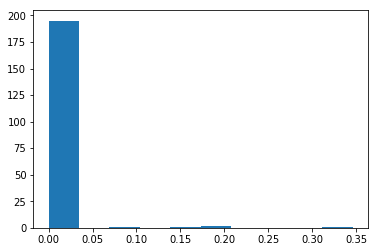

In [11]:
indices1, _ = hist_and_support(pca.weights)

In [12]:
pca1 = dill.load(open(filename, 'rb'))
subweights = pca.weights[indices1]
pca1.controlset = [pca1.controlset[i] for i in indices1]
pca1.probs = list(np.array(subweights.T/sum(subweights)).T)

In [13]:
# Save the weighted controls

import dill
dill.dump(pca0, open('0_' + filename, 'wb'))

import dill
dill.dump(pca1, open('1_' + filename, 'wb'))

# Diamond Norm

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from ipyparallel import Client
rc = Client(profile='mpi3')
dc = rc[:]

/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@GLaDOS')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [16]:
import os
dc.push({'cwd':os.getcwd()})

<AsyncResult: _push>

In [17]:
%%px
import os
os.chdir(cwd)

In [18]:
%%px
import dill
import itertools
import numpy as np
from pauli_channel_approximation import compute_dpn_and_fid
import matplotlib.pyplot as plt
from itertools import product

In [19]:
%%px 
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()

In [20]:
%%px
filename = 'pickled_controls4.pkl'
pca0 = dill.load(open('0_' + filename, 'rb')) # 0RBC
pca1 = dill.load(open('1_' + filename, 'rb')) # 1RBC

# Diamond Norm

In [21]:
%%px
import sys
import itertools
from itertools import product
from copy import deepcopy
from functools import reduce

from diamond import diamond_norm, jamiolkowski

def superoperator(unitary):

    return np.kron(unitary.conj(), unitary)

def choi_form(unitary):

    return jamiolkowski(superoperator(unitary))

# def diamond_distance(unitary_a,unitary_b):
#     return diamond_norm(choi_form(unitary_a) - choi_form(unitary_b))/2.

def diamond_distance(sopa, sopb):
    rtn = (jamiolkowski(sopa) - jamiolkowski(sopb))/2
    return diamond_norm(rtn)

def compute_diamond_norm(data):
    controlset, ambient_hamiltonian0, combo, dt, control_hamiltonians, target_operator, probs = data
    print("DOING COMBO {}".format(combo))
    sys.stdout.flush()
    fidelities = []
    projs = []
    sops = []
    controlset_unitaries = []
    d_norms = []

    for controls in controlset:
        newcontrols = deepcopy(controls)
        ambient_hamiltonian = [deepcopy(ah).astype("complex") for ah in ambient_hamiltonian0]
        for cnum, value in enumerate(combo):
            cnum -= len(ambient_hamiltonian0)
            if cnum >= 0:
                newcontrols[:, cnum] = newcontrols[:, cnum] * (1 + value)
            if cnum < 0:
                ambient_hamiltonian[cnum] *= float(value)
        print(ambient_hamiltonian, control_hamiltonians)
        step_unitaries = control_unitaries(ambient_hamiltonian,
                                           control_hamiltonians, newcontrols,
                                           dt)
        unitary = reduce(lambda a, b: a.dot(b), step_unitaries)
        sop = error_unitary(unitary, target_operator)
        sops.append(sop)
        d_norms.append(diamond_distance(sop, np.eye(sop.shape[0])))
    avg_sop = reduce(lambda a, b: a + b, [prob * sops[i] for i, prob in enumerate(probs)])
    d_norms.append(diamond_distance(avg_sop, np.eye(avg_sop.shape[0])))
    return d_norms

In [22]:
%%px
num_pts = 3
#pca0 and pca1 should have the same detunings, so we just use pca0 here.
base = 100*np.logspace(-4.7, np.log(pca0.detunings[0][0])/np.log(10), (num_pts - 1)/2)
controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations0 = [[det,0, 0] for det in controls]

controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations1 = [[0,det, det] for det in controls]

In [23]:
%%px
from pauli_channel_approximation import control_unitaries, error_unitary
def dnorms(pca):
    try:
        combo = combinations0[rank]
        #was pca0, probably the bug
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms0 = compute_diamond_norm(lst)

        combo = combinations1[rank]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms1 = compute_diamond_norm(lst)
    except IndexError:
        pass
    return d_norms0, d_norms1

# 0RBC

In [24]:
%%px
combo = combinations0[rank]
d_norms00, d_norms01 = dnorms(pca0)

[stdout:0] 
DOING COMBO [-0.0019952623149688785, 0, 0]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.

# 1RBC

In [25]:
%%px
d_norms10, d_norms11 = dnorms(pca1)

[stdout:0] 
DOING COMBO [-0.0019952623149688785, 0, 0]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.

In [26]:
num_pts = 3
controls = np.array([rc[i]['combo'][0] for i in range(num_pts)])

got unknown result: 12a5e7d6-83aa8d9e41f73ea6b89169d3


In [27]:
num_pts=3

In [28]:
diamond_norms00 = np.array([rc[i]['d_norms00'] for i in range(num_pts)])
diamond_norms01 = np.array([rc[i]['d_norms01'] for i in range(num_pts)])

got unknown result: 737f4a14-64d227789d9b8c15efc3a263


In [29]:
diamond_norms10 = np.array([rc[i]['d_norms10'] for i in range(num_pts)])
diamond_norms11 = np.array([rc[i]['d_norms11'] for i in range(num_pts)])

# If we don't include enough controls (say 20) the two plots will look similar. Need more controls for more diversity in the solutions.

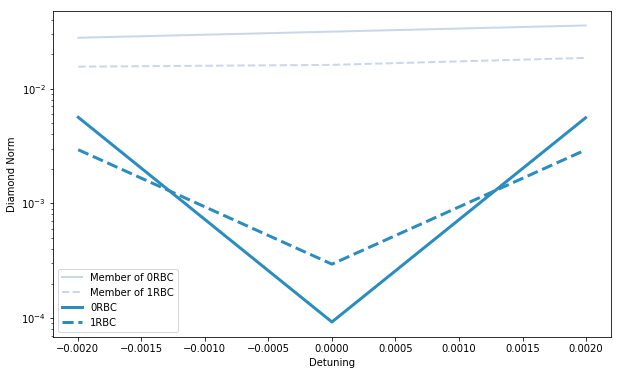

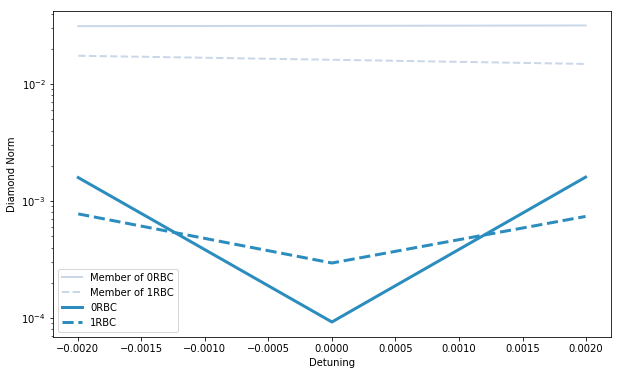

In [30]:
for a, b in ((diamond_norms00, diamond_norms10), (diamond_norms01, diamond_norms11)):
    plt.figure(figsize=(10,6))
    plt.semilogy(controls, np.array(a).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 0RBC", ls="-");
    plt.semilogy(controls, np.array(b).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 1RBC", ls="--");


    plt.semilogy(controls, np.array(a).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="0RBC", ls="-");
    plt.semilogy(controls,np.array(b).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="1RBC", ls="--");
    plt.ylabel("Diamond Norm")
    plt.xlabel("Detuning")
    plt.legend()